In [11]:
from BorderModel import BorderData, clean_df_subset
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from dbhelper import pd_query
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV

In [12]:
query = '''
        select 
            c.date,
            waittime,
            year,
            month,
            dayofweek,
            minofday,
            w.temp_max,
            w.temp_mean,
            w.temp_min,
            w.viz_max,
            w.wind_max,
            w.precip,
            w.rain,
            w.snow,
            w.fog,
            w.thunderstorm,
            wp1.temp_max as temp_max_p1,
            wp1.temp_mean as temp_mean_p1,
            wp1.temp_min as temp_min_p1,
            wp1.precip as precip_p1,
            wp1.rain as rain_p1,
            wp1.snow as snow_p1,
            wp1.thunderstorm as thunderstorm_p1,
            wp2.temp_max as temp_max_p2,
            wp2.temp_mean as temp_mean_p2,
            wp2.temp_min as temp_min_p2,
            wp2.precip as precip_p2,
            wp2.rain as rain_p2,
            wp2.snow as snow_p2,
            wp2.thunderstorm as thunderstorm_p2,
            wp3.temp_max as temp_max_p3,
            wp3.temp_mean as temp_mean_p3,
            wp3.temp_min as temp_min_p3,
            wp3.precip as precip_p3,
            wp3.rain as rain_p3,
            wp3.snow as snow_p3,
            wp3.thunderstorm as thunderstorm_p3,
            wm1.temp_max as temp_max_m1,
            wm1.temp_mean as temp_mean_m1,
            wm1.temp_min as temp_min_m1,
            wm1.precip as precip_m1,
            wm1.rain as rain_m1,
            wm1.snow as snow_m1,
            wm1.thunderstorm as thunderstorm_m1,
            wm2.temp_max as temp_max_m2,
            wm2.temp_mean as temp_mean_m2,
            wm2.temp_min as temp_min_m2,
            wm2.precip as precip_m2,
            wm2.rain as rain_m2,
            wm2.snow as snow_m2,
            wm2.thunderstorm as thunderstorm_m2,
            h.labor,
            h.newyears,
            h.us_mlk,
            h.us_washington,
            h.us_memorial,
            h.us_independence,
            h.us_columbus,
            h.us_veterans,
            h.us_thanksgiving,
            h.xmas,
            h.ca_goodfriday,
            h.ca_victoria,
            h.ca_canada,
            h.ca_civic,
            h.mothers,
            h.halloween,
            hp1.labor as labor_p1,
            hp1.newyears as newyears_p1,
            hp1.us_mlk as us_mlk_p1,
            hp1.us_washington as us_washington_p1,
            hp1.us_memorial as us_memorial_p1,
            hp1.us_independence as us_independence_p1,
            hp1.us_columbus as us_columbus_p1,
            hp1.us_veterans as us_veterans_p1,
            hp1.us_thanksgiving as us_thanksgiving_p1,
            hp1.xmas as xmas_p1,
            hp1.ca_goodfriday as ca_goodfriday_p1,
            hp1.ca_victoria as ca_victoria_p1,
            hp1.ca_canada as ca_canada_p1,
            hp1.ca_civic as ca_civic_p1,
            hp1.mothers as mothers_p1,
            hp1.halloween as halloween_p1,
            hm1.labor as labor_m1,
            hm1.newyears as newyears_m1,
            hm1.us_mlk as us_mlk_m1,
            hm1.us_washington as us_washington_m1,
            hm1.us_memorial as us_memorial_m1,
            hm1.us_independence as us_independence_m1,
            hm1.us_columbus as us_columbus_m1,
            hm1.us_veterans as us_veterans_m1,
            hm1.us_thanksgiving as us_thanksgiving_m1,
            hm1.xmas as xmas_m1,
            hm1.ca_goodfriday as ca_goodfriday_m1,
            hm1.ca_victoria as ca_victoria_m1,
            hm1.ca_canada as ca_canada_m1,
            hm1.ca_civic as ca_civic_m1,
            hm1.mothers as mothers_m1,
            hm1.halloween as halloween_m1,
            hp2.labor as labor_p2,
            hp2.newyears as newyears_p2,
            hp2.us_mlk as us_mlk_p2,
            hp2.us_washington as us_washington_p2,
            hp2.us_memorial as us_memorial_p2,
            hp2.us_independence as us_independence_p2,
            hp2.us_columbus as us_columbus_p2,
            hp2.us_veterans as us_veterans_p2,
            hp2.us_thanksgiving as us_thanksgiving_p2,
            hp2.xmas as xmas_p2,
            hp2.ca_goodfriday as ca_goodfriday_p2,
            hp2.ca_victoria as ca_victoria_p2,
            hp2.ca_canada as ca_canada_p2,
            hp2.ca_civic as ca_civic_p2,
            hp2.mothers as mothers_p2,
            hp2.halloween as halloween_p2,
            hm2.labor as labor_m2,
            hm2.newyears as newyears_m2,
            hm2.us_mlk as us_mlk_m2,
            hm2.us_washington as us_washington_m2,
            hm2.us_memorial as us_memorial_m2,
            hm2.us_independence as us_independence_m2,
            hm2.us_columbus as us_columbus_m2,
            hm2.us_veterans as us_veterans_m2,
            hm2.us_thanksgiving as us_thanksgiving_m2,
            hm2.xmas as xmas_m2,
            hm2.ca_goodfriday as ca_goodfriday_m2,
            hm2.ca_victoria as ca_victoria_m2,
            hm2.ca_canada as ca_canada_m2,
            hm2.ca_civic as ca_civic_m2,
            hm2.mothers as mothers_m2,
            hm2.halloween as halloween_m2,
            hp3.labor as labor_p3,
            hp3.newyears as newyears_p3,
            hp3.us_mlk as us_mlk_p3,
            hp3.us_washington as us_washington_p3,
            hp3.us_memorial as us_memorial_p3,
            hp3.us_independence as us_independence_p3,
            hp3.us_columbus as us_columbus_p3,
            hp3.us_veterans as us_veterans_p3,
            hp3.us_thanksgiving as us_thanksgiving_p3,
            hp3.xmas as xmas_p3,
            hp3.ca_goodfriday as ca_goodfriday_p3,
            hp3.ca_victoria as ca_victoria_p3,
            hp3.ca_canada as ca_canada_p3,
            hp3.ca_civic as ca_civic_p3,
            hp3.mothers as mothers_p3,
            hp3.halloween as halloween_p3,
            hm3.labor as labor_m3,
            hm3.newyears as newyears_m3,
            hm3.us_mlk as us_mlk_m3,
            hm3.us_washington as us_washington_m3,
            hm3.us_memorial as us_memorial_m3,
            hm3.us_independence as us_independence_m3,
            hm3.us_columbus as us_columbus_m3,
            hm3.us_veterans as us_veterans_m3,
            hm3.us_thanksgiving as us_thanksgiving_m3,
            hm3.xmas as xmas_m3,
            hm3.ca_goodfriday as ca_goodfriday_m3,
            hm3.ca_victoria as ca_victoria_m3,
            hm3.ca_canada as ca_canada_m3,
            hm3.ca_civic as ca_civic_m3,
            hm3.mothers as mothers_m3,
            hm3.halloween as halloween_m3,
            hp4.labor as labor_p4,
            hp4.newyears as newyears_p4,
            hp4.us_mlk as us_mlk_p4,
            hp4.us_washington as us_washington_p4,
            hp4.us_memorial as us_memorial_p4,
            hp4.us_independence as us_independence_p4,
            hp4.us_columbus as us_columbus_p4,
            hp4.us_veterans as us_veterans_p4,
            hp4.us_thanksgiving as us_thanksgiving_p4,
            hp4.xmas as xmas_p4,
            hp4.ca_goodfriday as ca_goodfriday_p4,
            hp4.ca_victoria as ca_victoria_p4,
            hp4.ca_canada as ca_canada_p4,
            hp4.ca_civic as ca_civic_p4,
            hp4.mothers as mothers_p4,
            hp4.halloween as halloween_p4,
            hm4.labor as labor_m4,
            hm4.newyears as newyears_m4,
            hm4.us_mlk as us_mlk_m4,
            hm4.us_washington as us_washington_m4,
            hm4.us_memorial as us_memorial_m4,
            hm4.us_independence as us_independence_m4,
            hm4.us_columbus as us_columbus_m4,
            hm4.us_veterans as us_veterans_m4,
            hm4.us_thanksgiving as us_thanksgiving_m4,
            hm4.xmas as xmas_m4,
            hm4.ca_goodfriday as ca_goodfriday_m4,
            hm4.ca_victoria as ca_victoria_m4,
            hm4.ca_canada as ca_canada_m4,
            hm4.ca_civic as ca_civic_m4,
            hm4.mothers as mothers_m4,
            hm4.halloween as halloween_m4,
            hp5.labor as labor_p5,
            hp5.newyears as newyears_p5,
            hp5.us_mlk as us_mlk_p5,
            hp5.us_washington as us_washington_p5,
            hp5.us_memorial as us_memorial_p5,
            hp5.us_independence as us_independence_p5,
            hp5.us_columbus as us_columbus_p5,
            hp5.us_veterans as us_veterans_p5,
            hp5.us_thanksgiving as us_thanksgiving_p5,
            hp5.xmas as xmas_p5,
            hp5.ca_goodfriday as ca_goodfriday_p5,
            hp5.ca_victoria as ca_victoria_p5,
            hp5.ca_canada as ca_canada_p5,
            hp5.ca_civic as ca_civic_p5,
            hp5.mothers as mothers_p5,
            hp5.halloween as halloween_p5,
            hm5.labor as labor_m5,
            hm5.newyears as newyears_m5,
            hm5.us_mlk as us_mlk_m5,
            hm5.us_washington as us_washington_m5,
            hm5.us_memorial as us_memorial_m5,
            hm5.us_independence as us_independence_m5,
            hm5.us_columbus as us_columbus_m5,
            hm5.us_veterans as us_veterans_m5,
            hm5.us_thanksgiving as us_thanksgiving_m5,
            hm5.xmas as xmas_m5,
            hm5.ca_goodfriday as ca_goodfriday_m5,
            hm5.ca_victoria as ca_victoria_m5,
            hm5.ca_canada as ca_canada_m5,
            hm5.ca_civic as ca_civic_m5,
            hm5.mothers as mothers_m5,
            hm5.halloween as halloween_m5,
            hp6.labor as labor_p6,
            hp6.newyears as newyears_p6,
            hp6.us_mlk as us_mlk_p6,
            hp6.us_washington as us_washington_p6,
            hp6.us_memorial as us_memorial_p6,
            hp6.us_independence as us_independence_p6,
            hp6.us_columbus as us_columbus_p6,
            hp6.us_veterans as us_veterans_p6,
            hp6.us_thanksgiving as us_thanksgiving_p6,
            hp6.xmas as xmas_p6,
            hp6.ca_goodfriday as ca_goodfriday_p6,
            hp6.ca_victoria as ca_victoria_p6,
            hp6.ca_canada as ca_canada_p6,
            hp6.ca_civic as ca_civic_p6,
            hp6.mothers as mothers_p6,
            hp6.halloween as halloween_p6,
            hp7.labor as labor_p7,
            hp7.newyears as newyears_p7,
            hp7.us_mlk as us_mlk_p7,
            hp7.us_washington as us_washington_p7,
            hp7.us_memorial as us_memorial_p7,
            hp7.us_independence as us_independence_p7,
            hp7.us_columbus as us_columbus_p7,
            hp7.us_veterans as us_veterans_p7,
            hp7.us_thanksgiving as us_thanksgiving_p7,
            hp7.xmas as xmas_p7,
            hp7.ca_goodfriday as ca_goodfriday_p7,
            hp7.ca_victoria as ca_victoria_p7,
            hp7.ca_canada as ca_canada_p7,
            hp7.ca_civic as ca_civic_p7,
            hp7.mothers as mothers_p7
        from mungedata c
        join datefeatures d on c.date = d.date
        left join publicholiday h on c.date::timestamp::date = h.date
        left join publicholiday hp1 on c.date::timestamp::date = hp1.date - interval '1 day'
        left join publicholiday hm1 on c.date::timestamp::date = hm1.date + interval '1 day'
        left join publicholiday hp2 on c.date::timestamp::date = hp2.date - interval '2 day'
        left join publicholiday hm2 on c.date::timestamp::date = hm2.date + interval '2 day'
        left join publicholiday hp3 on c.date::timestamp::date = hp3.date - interval '3 day'
        left join publicholiday hm3 on c.date::timestamp::date = hm3.date + interval '3 day'
        left join publicholiday hp4 on c.date::timestamp::date = hp4.date - interval '4 day'
        left join publicholiday hm4 on c.date::timestamp::date = hm4.date + interval '4 day'
        left join publicholiday hp5 on c.date::timestamp::date = hp5.date - interval '5 day'
        left join publicholiday hm5 on c.date::timestamp::date = hm5.date + interval '5 day'
        left join publicholiday hp6 on c.date::timestamp::date = hp6.date - interval '6 day'
        left join publicholiday hp7 on c.date::timestamp::date = hp7.date - interval '7 day'
        left join weather w on c.date::timestamp::date = w.date
        left join weather wp1 on c.date::timestamp::date = wp1.date - interval '1 day'
        left join weather wp2 on c.date::timestamp::date = wp2.date - interval '2 day'
        left join weather wp3 on c.date::timestamp::date = wp3.date - interval '3 day'
        left join weather wm1 on c.date::timestamp::date = wm1.date + interval '1 day'
        left join weather wm2 on c.date::timestamp::date = wm2.date + interval '2 day'
        where
            crossing_id = 5
            and c.date >= '2008-1-1'
            and munger_id = 2
            and (minute = 0 or minute = 30)
        order by c.date;
        '''

df = pd_query(query)

In [13]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X_train, data.y_train)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.912248670597
Best score:  0.579703872777
** MSE for last cv fold **
Baseline :  69.4958310754
Model    :  81.5404787575
** R^2 for last cv fold **
Baseline :  0.266861634576
Model    :  0.139797993821
** Explained variance for last cv fold **
Baseline :  0.376495880489
Model    :  0.363588871767


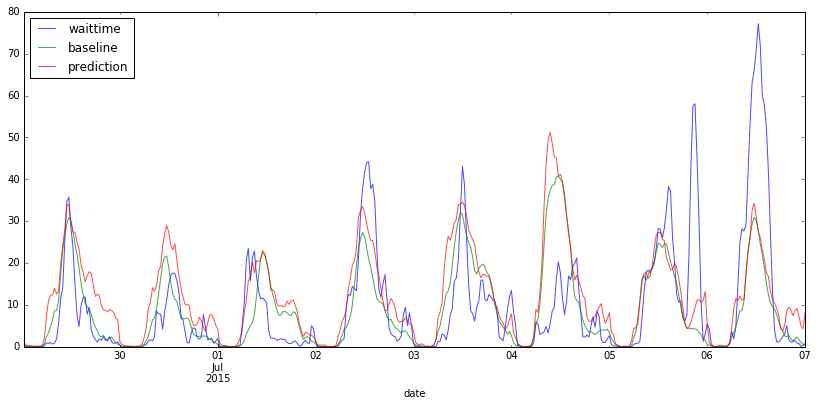

In [14]:
data.plot('6/29/15', '7/7/15');

## Similar performance as for crossing 1

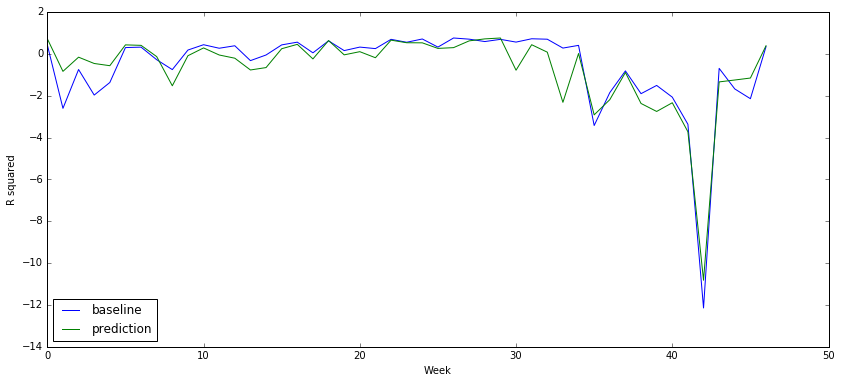

In [15]:
import copy
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

baseline = copy.copy(data.baseline)
yhat = copy.copy(data.yhat)
actual = data.df.copy().reset_index()
actual = list(actual[actual.date >= '2015']['waittime'])

r2 = []
start = 0
for i in range(47):
    r2.append((r2_score(actual[start:start+336], baseline[start:start+336].values),
               r2_score(actual[start:start+336], yhat[start:start+336].values)))
    start += 336

r2 = np.array(r2)

plt.figure(figsize=(14,6))
plt.plot(range(47), r2[:,0], label='baseline')
plt.plot(range(47), r2[:,1], label='prediction')
plt.xlabel('Week')
plt.ylabel('R squared')
plt.legend(loc='lower left');

## Run against full dataset to pickle for MVP

In [16]:
data = BorderData(df)

model = ExtraTreesRegressor(n_jobs=-1, n_estimators=100, bootstrap=True, oob_score=True)
params = {}
grid = GridSearchCV(model, params, cv=data.cv_train)
grid.fit(data.X, data.y)
data.predict(grid)
data.print_metrics(grid)

OOB:  0.917750376133
Best score:  0.578735782864
** MSE for last cv fold **
Baseline :  69.4958310754
Model    :  0.913810370117
** R^2 for last cv fold **
Baseline :  0.266861634576
Model    :  0.990359861438
** Explained variance for last cv fold **
Baseline :  0.376495880489
Model    :  0.990433280452


In [17]:
import cPickle as pickle

with open('../models/xt_v0.5_x5.pkl', 'w') as f:
    pickle.dump(grid.best_estimator_, f)